<a href="https://colab.research.google.com/github/mikemykhaylov/MAT-494/blob/main/1_2_Elements_of_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%pip install numpy seaborn scipy matplotlib ipympl

In [11]:
from google.colab import output
output.enable_custom_widget_manager()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from itertools import combinations

In [13]:
%matplotlib widget

# 1.2 Elements of linear algebra

Topics of this chapter
- Orthogonality and orthonormality
- Best approximation
- Gram-Schmidt orthogonalization
- Eigenvalues and eigenvectors

## Orthogonality and orthonormality
A set of vectors $\{\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_n\}$ is called **orthogonal** if $\mathbf{u}_i^T \mathbf{u}_j = 0$ for all $i \neq j$. If, in addition, $\mathbf{u}_i^T \mathbf{u}_i = 1$ for all $i$, then the set is called **orthonormal**.

[[ 0.69698759 -0.03785168  0.71608348]
 [-0.68054378  0.27978685  0.67718497]
 [-0.22598333 -0.95931568  0.16924823]]
(array([ 0.69698759, -0.68054378, -0.22598333]), array([-0.03785168,  0.27978685, -0.95931568])) -5.551115123125783e-17
(array([ 0.69698759, -0.68054378, -0.22598333]), array([0.71608348, 0.67718497, 0.16924823])) 3.469446951953614e-17
(array([-0.03785168,  0.27978685, -0.95931568]), array([0.71608348, 0.67718497, 0.16924823])) -5.551115123125783e-17
[ 0.69698759 -0.68054378 -0.22598333] 1.0000000000000002
[-0.03785168  0.27978685 -0.95931568] 1.0000000000000002
[0.71608348 0.67718497 0.16924823] 1.0000000000000002


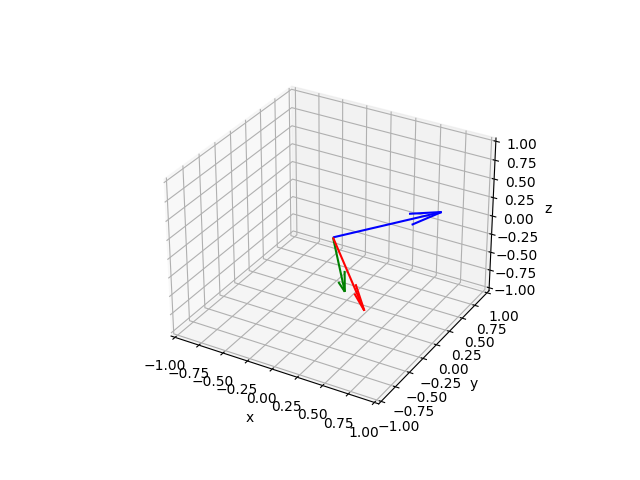

In [14]:
# create a set of orthogonal vectors
u1 = np.array([1, 0, 0])
u2 = np.array([0, 1, 0])
u3 = np.array([0, 0, 1])

# create some random rotation matrix
R = sp.spatial.transform.Rotation.random().as_matrix()
print(R)

# rotate the vectors
u1 = R @ u1
u2 = R @ u2
u3 = R @ u3

basis = np.array([u1, u2, u3])

def my_dot(a, b):
    out = 0
    for i in range(len(a)):
        out += a[i] * b[i]
    return out

def my_norm(a):
    return np.sqrt(my_dot(a, a))

# check that they are orthogonal (all dot products should be zero, but might be close to zero due to numerical errors)
pairs = list(combinations(basis, 2))
for pair in pairs:
    print(pair, my_dot(*pair))

# check that they are orthonormal
for u in basis:
    print(u, my_norm(u))

# plot 3d vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, u1[0], u1[1], u1[2], color='r')
ax.quiver(0, 0, 0, u2[0], u2[1], u2[2], color='g')
ax.quiver(0, 0, 0, u3[0], u3[1], u3[2], color='b')

# set the axes limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# name the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Best Approximation
Given a set of vectors $\{\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_n\}$, we want to find the best approximation of a vector $\mathbf{b}$ in the form of a linear combination of the vectors in the set, i.e., $\mathbf{b} \approx \sum_{i=1}^n c_i \mathbf{u}_i$. The best approximation is the one that minimizes the error $\mathbf{e} = \mathbf{b} - \sum_{i=1}^n c_i \mathbf{u}_i$. The error is orthogonal to each of the vectors in the set, i.e., $\mathbf{e}^T \mathbf{u}_i = 0$ for all $i$. In this example, we will find an approximation to a 3D vector $\mathbf{b}$ in a 2D subspace spanned by two vectors $\mathbf{u}_1$ and $\mathbf{u}_2$. They will come from the previous example.

In [15]:
# create a random vector that we will approximate with a linear combination of u1 and u2
b = np.random.rand(3)
b = b / my_norm(b)
print(b)

# verify that b is not orthogonal to u1 and u2
print(my_dot(b, u1))
print(my_dot(b, u2))

# project b onto u1 and u2
def my_proj(u, basis):
    out = np.zeros_like(u)
    for vec in basis:
        out += my_dot(u, vec) * vec
    return out

b_proj = my_proj(b, np.array([u1, u2]))

# calculate the error
error = b - b_proj
print(my_norm(error))

[0.43619253 0.51343851 0.73899728]
-0.21239766487525344
-0.5817889540004296
0.7851170899672392


(100, 2)


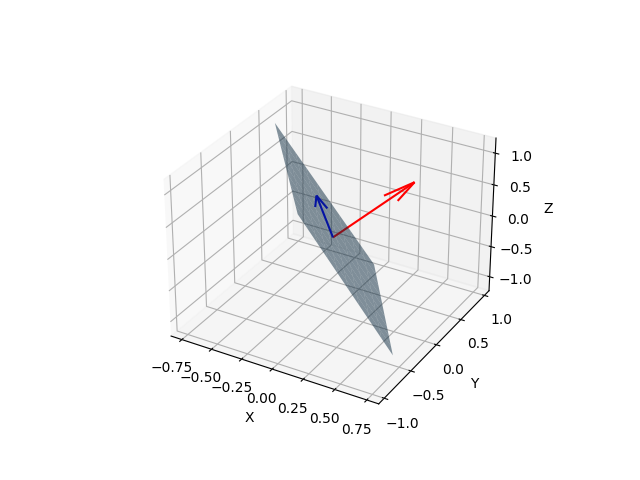

In [16]:
# create a grid of points
s, t = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
plane_points = np.array([s.flatten(), t.flatten()]).T

# this is an array of all our (limited) linear combination coefficients of u1 and u2
print(plane_points.shape)

# here we create the linear combination of u1 and u2 that constitutes the plane
X = plane_points[:, 0][:, np.newaxis] * u1 + plane_points[:, 1][:, np.newaxis] * u2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X[:, 0].reshape(s.shape), X[:, 1].reshape(s.shape), X[:, 2].reshape(s.shape), alpha=0.5)
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='r')
ax.quiver(0, 0, 0, b_proj[0], b_proj[1], b_proj[2], color='b')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Gram-Schmidt orthogonalization
Given a set of linearly independent vectors $\{\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_n\}$, we want to find an orthogonal set of vectors $\{\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_n\}$ that spans the same subspace. The process of finding the orthogonal set is called **Gram-Schmidt orthogonalization**. The orthogonal vectors are given by

[0.6325969  0.0653573  0.33831165] [0.92699259 0.44269985 0.16843286] [0.66164069 0.07716239 0.32942345]


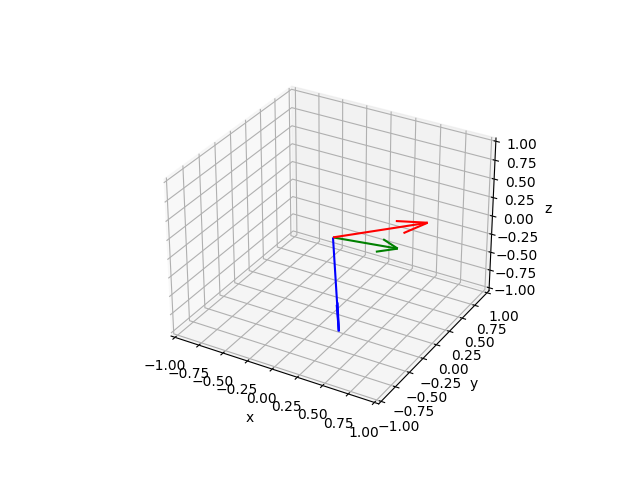

In [17]:
u1, u2, u3 = np.random.rand(3, 3)
print(u1, u2, u3)

def my_gram_schmidt(basis):
    out = []
    out.append(basis[0] / my_norm(basis[0]))
    for vec in basis[1:]:
        vec = vec.copy()
        projection = my_proj(vec, out)
        vec -= projection
        out.append(vec / my_norm(vec))
    return np.array(out)

basis = my_gram_schmidt(np.array([u1, u2, u3]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, basis[0][0], basis[0][1], basis[0][2], color='r')
ax.quiver(0, 0, 0, basis[1][0], basis[1][1], basis[1][2], color='g')
ax.quiver(0, 0, 0, basis[2][0], basis[2][1], basis[2][2], color='b')

# set the axes limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# name the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Eigenvalues and eigenvectors
Given a square matrix $\mathbf{A}$, we want to find a vector $\mathbf{v}$ and a scalar $\lambda$ such that $\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$. The vector $\mathbf{v}$ is called an **eigenvector** of $\mathbf{A}$ and the scalar $\lambda$ is called an **eigenvalue** of $\mathbf{A}$. The eigenvalue problem can be written as $(\mathbf{A} - \lambda \mathbf{I}) \mathbf{v} = \mathbf{0}$. This equation has a nontrivial solution if and only if $\det(\mathbf{A} - \lambda \mathbf{I}) = 0$. This equation is called the **characteristic equation** of $\mathbf{A}$ and the left-hand side is called the **characteristic polynomial** of $\mathbf{A}$. The eigenvalues are the roots of the characteristic polynomial. The eigenvectors can be found by solving the equation $(\mathbf{A} - \lambda \mathbf{I}) \mathbf{v} = \mathbf{0}$ for each eigenvalue $\lambda$.

In [18]:
a = np.array([[0, 1], [2, -3]])
val, vect = np.linalg.eig(a)
print("eigenvalues: ", val)
print("eigenvectors: \n", vect)

eigenvalues:  [ 0.56155281 -3.56155281]
eigenvectors: 
 [[ 0.87192821 -0.27032301]
 [ 0.48963374  0.96276969]]


For a symmetric matrix, the eigenvalues are real and the eigenvectors are orthogonal. The eigenvectors can be used to diagonalize the matrix, i.e., $\mathbf{A} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^T$, where $\mathbf{Q}$ is an orthogonal matrix whose columns are the eigenvectors of $\mathbf{A}$ and $\mathbf{\Lambda}$ is a diagonal matrix whose diagonal elements are the eigenvalues of $\mathbf{A}$.

In [19]:
a = np.array([[1, 2, 3], [2, 5, 6], [3, 6, 9]])
print("a: \n", a)

val, vect = np.linalg.eig(a)
print("eigenvalues: ", val)
print("eigenvectors: \n", vect)

# check that the eigenvectors are orthogonal
pairs = list(combinations(vect, 2))
for pair in pairs:
    print(my_dot(*pair))

# verify decomposition
print(vect @ np.diag(val) @ np.linalg.inv(vect))

a: 
 [[1 2 3]
 [2 5 6]
 [3 6 9]]
eigenvalues:  [1.43007353e+01 5.26454255e-16 6.99264746e-01]
eigenvectors: 
 [[ 2.61496397e-01  9.48683298e-01  1.77819106e-01]
 [ 5.62313386e-01 -3.06359261e-17 -8.26924214e-01]
 [ 7.84489190e-01 -3.16227766e-01  5.33457318e-01]]
2.7755575615628914e-17
-1.249000902703301e-16
-5.551115123125783e-17
[[1. 2. 3.]
 [2. 5. 6.]
 [3. 6. 9.]]
